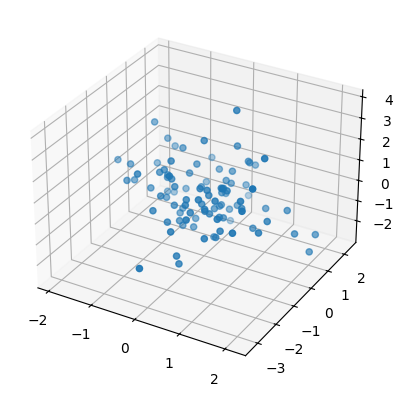

(100, 3)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
X = np.random.randn(100, 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()
X.shape

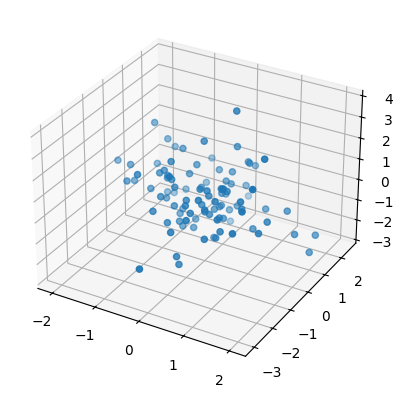

In [2]:
X_centered = X - X.mean(axis=0)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2])
plt.show()

In [3]:
U, s, Vt = np.linalg.svd(X_centered)
len(Vt), Vt

(3,
 array([[-0.14276678, -0.34442383,  0.9278954 ],
        [ 0.27861938, -0.91357208, -0.29623857],
        [-0.94973096, -0.21623661, -0.22639089]]))

In [4]:
c1 = Vt[0]
c2 = Vt[1]

In [5]:
W2 = Vt[:2].T
X2D = X_centered @ W2

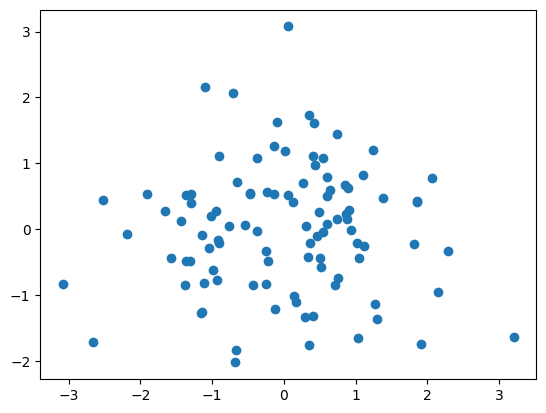

In [6]:
plt.scatter(X2D[:,0], X2D[:,1])

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

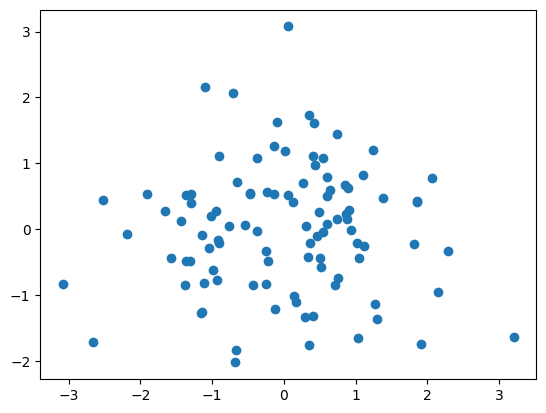

In [8]:
plt.scatter(X2D[:,0], X2D[:,1])

In [9]:
pca.explained_variance_ratio_

array([0.45375329, 0.3221149 ])

In [10]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)

X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_

array([9.70466436e-02, 7.09592406e-02, 6.16908876e-02, 5.38941949e-02,
       4.86879702e-02, 4.31223132e-02, 3.27192995e-02, 2.88389545e-02,
       2.76202940e-02, 2.35700055e-02, 2.10918962e-02, 2.02299108e-02,
       1.71581820e-02, 1.69211143e-02, 1.57864128e-02, 1.48295261e-02,
       1.32456095e-02, 1.27689737e-02, 1.18726294e-02, 1.15268370e-02,
       1.06616621e-02, 1.00671337e-02, 9.53573327e-03, 9.12543746e-03,
       8.83404692e-03, 8.39319141e-03, 8.12578809e-03, 7.86366084e-03,
       7.44733102e-03, 6.90859128e-03, 6.58093773e-03, 6.48147870e-03,
       6.02615030e-03, 5.86582188e-03, 5.70021474e-03, 5.43627771e-03,
       5.05786416e-03, 4.87858604e-03, 4.81429342e-03, 4.72266326e-03,
       4.56746921e-03, 4.44836012e-03, 4.18501329e-03, 3.98215339e-03,
       3.84974607e-03, 3.75103387e-03, 3.62008852e-03, 3.51591277e-03,
       3.40058205e-03, 3.21874467e-03, 3.19017051e-03, 3.12804939e-03,
       2.95982668e-03, 2.88954600e-03, 2.84130398e-03, 2.71435811e-03,
      

In [11]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [12]:
cumsum[:20]

array([0.09704664, 0.16800588, 0.22969677, 0.28359097, 0.33227894,
       0.37540125, 0.40812055, 0.4369595 , 0.4645798 , 0.4881498 ,
       0.5092417 , 0.52947161, 0.54662979, 0.56355091, 0.57933732,
       0.59416685, 0.60741246, 0.62018143, 0.63205406, 0.6435809 ])

In [13]:
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [14]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [15]:
pca.n_components_

154

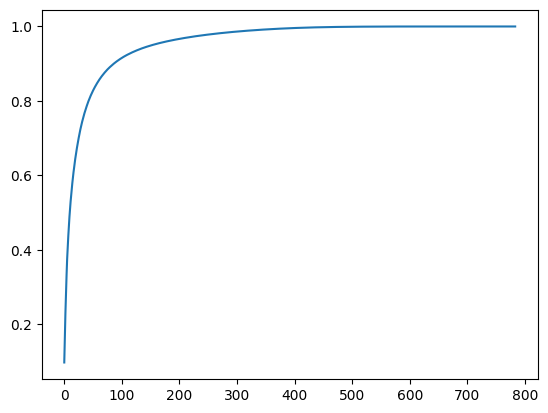

In [16]:
plt.plot(cumsum)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(
    PCA(random_state=42),
    RandomForestClassifier(random_state=42)
)

param_distrib = {
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50,500)
}

rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3, random_state=42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [18]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}

In [19]:
X_recovered = pca.inverse_transform(X_reduced)

In [20]:
rnd_pca = PCA(n_components=154, svd_solver='randomized', random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

In [21]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [22]:
filename = "my_mnist.mmap"
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mmap[:] = X_train
X_mmap.flush()

In [23]:
X_mmap = np.memmap(filename, dtype="float32", mode="readonly").reshape(-1, 784)
batch_size = X_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=600, n_components=154)

In [24]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

m, eps = 5_000, 0.1
d = johnson_lindenstrauss_min_dim(m, eps=eps)
d

7300

In [25]:
n = 20_000
np.random.seed(42)
P = np.random.randn(d, n) / np.sqrt(d)

In [26]:
X = np.random.rand(m, n)
X_reduced = X @ P.T

In [27]:
from sklearn.random_projection import GaussianRandomProjection

gaussian_rnd_proj = GaussianRandomProjection(random_state=42)
X_reduced = gaussian_rnd_proj.fit_transform(X)

In [28]:
gaussian_rnd_proj.components_

array([[ 5.81359943e-03, -1.61826124e-03,  7.58062095e-03, ...,
         4.42829826e-03,  2.00553485e-02, -1.89597272e-02],
       [ 4.07638220e-03,  3.31605183e-03, -1.09611357e-02, ...,
         7.21559891e-03,  9.53444696e-03,  4.16636507e-03],
       [-5.52267488e-03,  1.18527859e-02, -2.31960160e-03, ...,
         1.65039881e-03, -2.55380604e-02, -7.48780800e-05],
       ...,
       [-1.03564530e-02,  7.94509570e-03, -5.69474166e-03, ...,
         1.14580829e-02, -1.29950377e-02, -1.59301221e-02],
       [-6.77138686e-03, -5.90454856e-03,  1.23942811e-02, ...,
        -2.01775486e-02, -1.75452980e-03, -7.52724235e-03],
       [-4.12988138e-03,  1.24015654e-02,  3.58943880e-04, ...,
        -6.18872802e-03,  5.77292951e-04,  6.83212442e-03]])

In [29]:
components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_)

In [30]:
X_recovered = X_reduced @ components_pinv.T

In [31]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

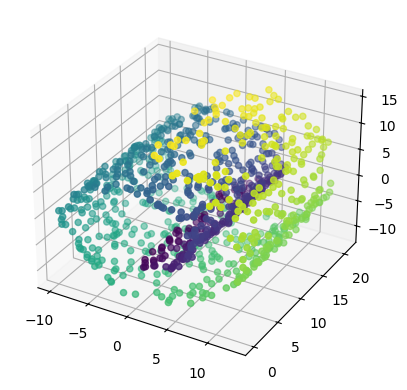

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_swiss[:,0], X_swiss[:,1], X_swiss[:,2], c=t)
fig.show()

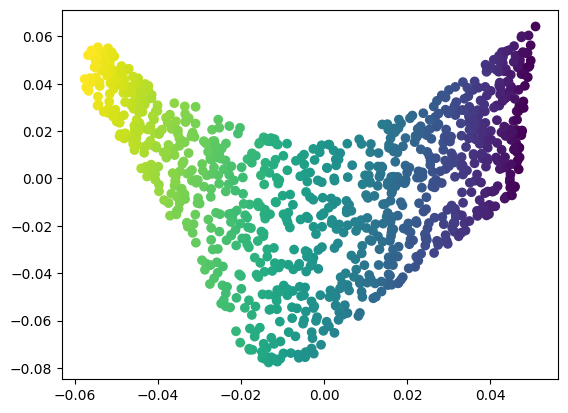

In [33]:
plt.scatter(X_unrolled[:,0], X_unrolled[:,1], c=t)
plt.show()

In [34]:
from sklearn.manifold import MDS
mds = MDS(random_state=42)
X_unrolled = mds.fit_transform(X_swiss)

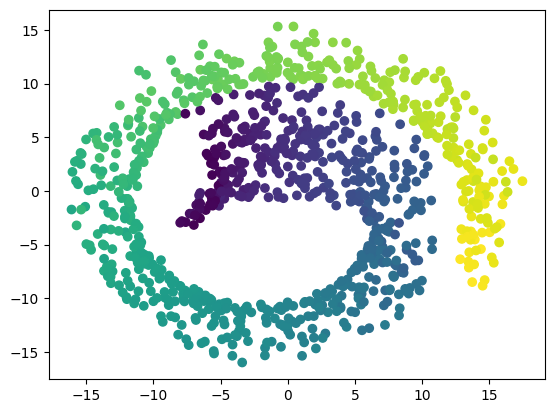

In [35]:
plt.scatter(X_unrolled[:,0], X_unrolled[:,1], c=t)
plt.show()

In [36]:
from sklearn.manifold import Isomap

isomap = Isomap()
X_unrolled = isomap.fit_transform(X_swiss)

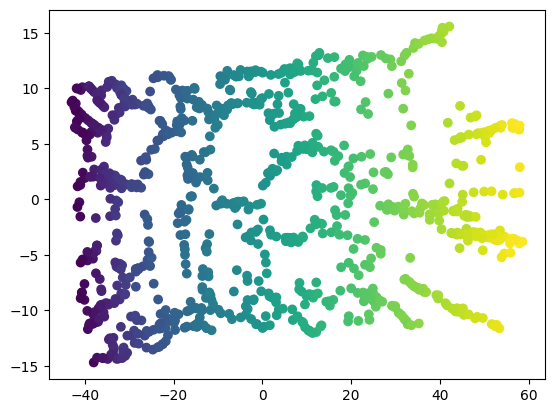

In [37]:
plt.scatter(X_unrolled[:,0], X_unrolled[:,1], c=t)
plt.show()

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE()
X_unrolled = tsne.fit_transform(X_swiss)

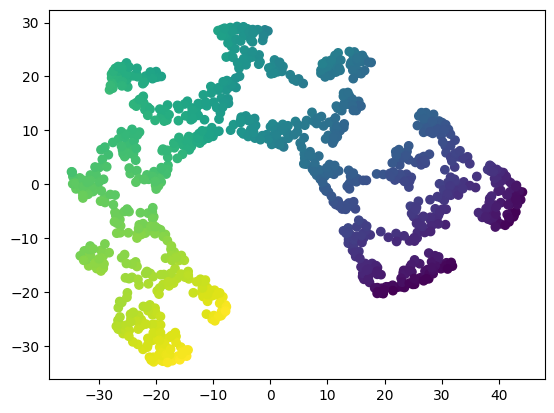

In [39]:
plt.scatter(X_unrolled[:,0], X_unrolled[:,1], c=t)
plt.show()